#### IMPORT LIBRARIES

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.utils import to_categorical
from keras.models import Sequential, save_model
from keras.layers import Dense
from tensorflow import keras

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#### LOAD DATA

In [31]:
filepath = ".\\images\\"

In [32]:
Y_orig = np.array([i for i in np.append(np.arange(1, 10), 0) for _ in range(20)])
X_orig = []
m = 200
for i in range(1, m+1):
    img = Image.open(filepath + 'img' + str(i) + '.jpg')
    img = img.resize((28, 28))
    X = 255 - np.array(img)
    X_orig.append(X)
X_orig = np.array(X_orig)
X_orig.shape, Y_orig.shape

((200, 28, 28), (200,))

#### VISUALIZE DATA

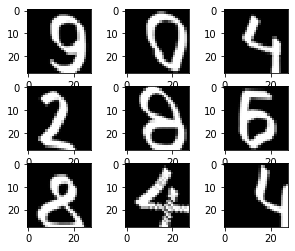

In [33]:
# Look at some image in dataset
random_idx = np.random.randint(len(X_orig), size=9)
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_orig[idx])

#### DEFINE SOME HELPFUL FUNCTIONS

In [34]:
def reshape(X_train, Y_train, X_test, Y_test):
    # Flattern and Standardize
    X_train = X_train.reshape(X_train.shape[0], -1).astype("float32") / 255
    X_test = X_test.reshape(X_test.shape[0], -1).astype("float32") / 255

    # Convert to One-Hot
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    return X_train, Y_train, X_test, Y_test

In [35]:
def NN_model_3_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=784, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0075), metrics=['accuracy'])
    return model

#### PREPROCESSING

In [36]:
# Reshape data
img_size = 28
num_samples = X_orig.shape[0]
X_orig = np.array(X_orig).reshape(m, img_size*img_size)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_orig, Y_orig, test_size = 0.2, random_state=0)
X_train, Y_train, X_test, Y_test = reshape(X_train, Y_train, X_test, Y_test)
print('After reshape and flattern:')
print('Number of training examples: ', str(X_train.shape[0]))
print('Number of testing examples: ', str(X_test.shape[0]))
print('Training set: X_train = %s, Y_train = %s' % (X_train.shape, Y_train.shape))
print('Testing set: X_test = %s, Y_test = %s' % (X_test.shape, Y_test.shape))
print('Each example size: ', X_train[0].shape)

After reshape and flattern:
Number of training examples:  160
Number of testing examples:  40
Training set: X_train = (160, 784), Y_train = (160, 10)
Testing set: X_test = (40, 784), Y_test = (40, 10)
Each example size:  (784,)


#### TRAINING MODEL - DISPLAY ON TEST DATA

In [41]:
model = NN_model_3_layers()
history = model.fit(X_train, Y_train, epochs=40, batch_size=64)

Epoch 1/40
3/3 [==============================] - 0s 0s/step - loss: 2.3276 - accuracy: 0.0672
Epoch 2/40
3/3 [==============================] - 0s 1ms/step - loss: 2.1453 - accuracy: 0.2277
Epoch 3/40
3/3 [==============================] - 0s 1ms/step - loss: 1.8440 - accuracy: 0.3859
Epoch 4/40
3/3 [==============================] - 0s 1ms/step - loss: 1.5593 - accuracy: 0.4637
Epoch 5/40
3/3 [==============================] - 0s 1ms/step - loss: 1.3659 - accuracy: 0.5504
Epoch 6/40
3/3 [==============================] - 0s 1ms/step - loss: 1.0944 - accuracy: 0.7152
Epoch 7/40
3/3 [==============================] - 0s 1ms/step - loss: 0.9103 - accuracy: 0.7465
Epoch 8/40
3/3 [==============================] - 0s 1ms/step - loss: 0.7239 - accuracy: 0.8055
Epoch 9/40
3/3 [==============================] - 0s 1ms/step - loss: 0.6022 - accuracy: 0.8199
Epoch 10/40
3/3 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.8801
Epoch 11/40
3/3 [=======================

In [43]:
# The reason the test accuracy is small because I don't have a large data set
# I think it's able to increase the dataset size by using data augmentation
test_scores = model.evaluate(X_test, Y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy: ", test_scores[1] * 100)

2/2 - 0s - loss: 3.2037 - accuracy: 0.5500
Test loss: 3.2036757469177246
Test accuracy:  55.000001192092896


#### SAVE MODEL

In [ ]:
save_model(model, filepath = './digit_predict_model', save_format='h5')